# Linear Regression Modeling of King County Real Estate Sale Prices
<b>Authors:</b> Aisha Baitemoriva-Othman, Angela Kim, Steven Addison, Wahaj Dar
\
<b>Instructor:</b> David Elliott
----

## Overview

This project analyzes King County residential real estate in Washington state.

## Business Problem

Real estate agencies

## Data Understanding

This dataset contains information about residential real estate in King County between May 2014 - May 2015. It includes details such as number of bedrooms and bathrooms, square footage of the home, and various features regarding location.

## Data Preparation & Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.drop(labels=['id', 'date'], axis=1, inplace=True)
# df['date'] = pd.to_datetime(df['date'])
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['waterfront'] = df['waterfront'].fillna('NO')
df['waterfront'] = df['waterfront'].str.replace('NO', '0')
df['waterfront'] = df['waterfront'].str.replace('YES', '1')
df['waterfront'] = pd.to_numeric(df['waterfront'])
df['view'] = df['view'].fillna('NONE')
df['grade'] = df['grade'].str.replace('7 Average', '7')
df['grade'] = df['grade'].str.replace('8 Good', '8')
df['grade'] = df['grade'].str.replace('9 Better', '9')
df['grade'] = df['grade'].str.replace('6 Low Average', '6')
df['grade'] = df['grade'].str.replace('10 Very Good', '10')
df['grade'] = df['grade'].str.replace('11 Excellent', '11')
df['grade'] = df['grade'].str.replace('5 Fair', '5')
df['grade'] = df['grade'].str.replace('12 Luxury', '12')
df['grade'] = df['grade'].str.replace('4 Low', '4')
df['grade'] = df['grade'].str.replace('13 Mansion', '13')
df['grade'] = df['grade'].str.replace('3 Poor', '3')
df['grade'] = pd.to_numeric(df['grade'])
if [df[df['sqft_basement'] == '?']]:
    df['sqft_basement'] = df['sqft_living'] - df['sqft_above']
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

In [ ]:
import geopy
from geopy import distance
bellevue = (47.601, -122.2015)

def distancer(row):
    coords_1 = bellevue
    coords_2 = (row['lat'], row['long'])
    return geopy.distance.distance(coords_1, coords_2).miles

df['distance_from_bellevue'] = df.apply(distancer, axis=1)

In [ ]:
df.head()

In [4]:
from sklearn.preprocessing import OneHotEncoder
condition = df[['condition']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(condition)
condition_enc = ohe.transform(condition)
condition_enc = pd.DataFrame(condition_enc, columns=['cond_avg','cond_fair','cond_good','cond_poor','cond_verygood'], index=df.index)
df.drop('condition', axis=1, inplace=True)
df = pd.concat([df, condition_enc], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,cond_avg,cond_fair,cond_good,cond_poor,cond_verygood
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,7,1180,...,98178,47.5112,-122.257,1340,5650,1.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,0,NONE,7,2170,...,98125,47.7210,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,770,10000,1.0,0,NONE,6,770,...,98028,47.7379,-122.233,2720,8062,1.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,5000,1.0,0,NONE,7,1050,...,98136,47.5208,-122.393,1360,5000,0.0,0.0,0.0,0.0,1.0
4,510000.0,3,2.00,1680,8080,1.0,0,NONE,8,1680,...,98074,47.6168,-122.045,1800,7503,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,NONE,8,1530,...,98103,47.6993,-122.346,1530,1509,1.0,0.0,0.0,0.0,0.0
21593,400000.0,4,2.50,2310,5813,2.0,0,NONE,8,2310,...,98146,47.5107,-122.362,1830,7200,1.0,0.0,0.0,0.0,0.0
21594,402101.0,2,0.75,1020,1350,2.0,0,NONE,7,1020,...,98144,47.5944,-122.299,1020,2007,1.0,0.0,0.0,0.0,0.0
21595,400000.0,3,2.50,1600,2388,2.0,0,NONE,8,1600,...,98027,47.5345,-122.069,1410,1287,1.0,0.0,0.0,0.0,0.0


In [5]:
view = df[['view']]
ohe.fit(view)
view_enc = ohe.transform(view)
view_enc = pd.DataFrame(view_enc, columns=['view_avg','view_excellent','view_fair','view_good','view_none'], index=df.index)
df.drop('view', axis=1, inplace=True)
df = pd.concat([df, view_enc], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21597 non-null  float64
 1   bedrooms        21597 non-null  int64  
 2   bathrooms       21597 non-null  float64
 3   sqft_living     21597 non-null  int64  
 4   sqft_lot        21597 non-null  int64  
 5   floors          21597 non-null  float64
 6   waterfront      21597 non-null  int64  
 7   grade           21597 non-null  int64  
 8   sqft_above      21597 non-null  int64  
 9   sqft_basement   21597 non-null  int64  
 10  yr_built        21597 non-null  int64  
 11  yr_renovated    21597 non-null  float64
 12  zipcode         21597 non-null  int64  
 13  lat             21597 non-null  float64
 14  long            21597 non-null  float64
 15  sqft_living15   21597 non-null  int64  
 16  sqft_lot15      21597 non-null  int64  
 17  cond_avg        21597 non-null 

In [7]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='RdBu', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,cond_avg,cond_fair,cond_good,cond_poor,cond_verygood,view_avg,view_excellent,view_fair,view_good,view_none
price,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bedrooms,0.31,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bathrooms,0.53,0.51,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sqft_living,0.70,0.58,0.76,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sqft_lot,0.09,0.03,0.09,0.17,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
floors,0.26,0.18,0.50,0.35,-0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
waterfront,0.26,-0.00,0.06,0.10,0.02,0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
grade,0.67,0.36,0.67,0.76,0.11,0.46,0.08,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sqft_above,0.61,0.48,0.69,0.88,0.18,0.52,0.07,0.76,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sqft_basement,0.32,0.30,0.28,0.44,0.02,-0.25,0.08,0.17,-0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
df.columns

In [ ]:
scatter_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                   'floors', 'waterfront', 'grade', 'sqft_above', 'sqft_basement',
                   'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15','sqft_lot15']
df_scatter = df[scatter_columns]
df_scatter

In [ ]:
sns.pairplot(df_scatter, corner=True);

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

outcome = 'price'
predictors = '+'.join(df.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.225e+29
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:16:07   Log-Likelihood:             3.6423e+05
No. Observations:               21597   AIC:                        -7.284e+05
Df Residuals:                   21572   BIC:                        -7.282e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.334e-08    1.2e-07      0.278      0.781   -2.02e-07    2.68e-07
price              1.0000   3.89e-16   2.57e+15      0.000       1.000       1.000
bedrooms        5.358e-12   1.09e-10      0.049      0.961   -2.09e-10     2.2e-10
bathrooms       -3.22e-11   1.87e-10     -0.172      0.863   -3.99e-10    3.34e-10
sqft_living     2.058e-14   1.37e-13      0.151      0.880   -2.47e-13    2.89e-13
sqft_lot        8.159e-16   2.74e-15      0.298      0.765   -4.55e-15    6.18e-15
floors          7.957e-11   2.06e-10      0.387      0.699   -3.24e-10    4.83e-10
waterfront      -1.58e-10   1.18e-09     -0.134      0.894   -2.48e-09    2.16e-09
grade          -2.253e-11   1.29e-10     -0.175      0.861   -2.76e-10     2.3e-10
sqft_above      2.434e-14   1.31e-13      0.185      0.853   -2.33e-13    2.82e-13
sqft_basement  -1.177e-14   1.52e-13     -0.078      0.938   -3.09e-13    2.86e-13
yr_built        1.301e-13   4.27e-12      0.031      0.976   -8.23e-12    8.49e-12
yr_renovated    1.404e-14   2.28e-13      0.062      0.951   -4.32e-13     4.6e-13
zipcode         -5.22e-13    1.9e-12     -0.274      0.784   -4.25e-12    3.21e-12
lat             2.994e-11   6.56e-10      0.046      0.964   -1.26e-09    1.32e-09
long            5.214e-11   7.56e-10      0.069      0.945   -1.43e-09    1.53e-09
sqft_living15   1.022e-14   1.97e-13      0.052      0.959   -3.76e-13    3.97e-13
sqft_lot15      8.264e-16   4.18e-15      0.197      0.843   -7.38e-15    9.03e-15
cond_avg        5.853e-09    2.4e-08      0.244      0.807   -4.12e-08    5.29e-08
cond_fair       7.841e-09    2.4e-08      0.326      0.744   -3.92e-08    5.49e-08
cond_good       6.497e-09    2.4e-08      0.271      0.786   -4.05e-08    5.35e-08
cond_poor       3.457e-09   2.41e-08      0.144      0.886   -4.37e-08    5.06e-08
cond_verygood    5.54e-09    2.4e-08      0.231      0.817   -4.15e-08    5.26e-08
view_avg        7.842e-09    2.4e-08      0.327      0.744   -3.92e-08    5.49e-08
view_excellent  5.954e-09    2.4e-08      0.248      0.804   -4.11e-08     5.3e-08
view_fair       8.368e-09    2.4e-08      0.349      0.727   -3.87e-08    5.54e-08
view_good       2.491e-09    2.4e-08      0.104      0.917   -4.46e-08    4.95e-08
view_none       4.328e-09    2.4e-08      0.181      0.857   -4.26e-08    5.13e-08
==============================================================================
Omnibus:                    11005.708   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66583.036
Skew:                          -2.457   Prob(JB):                         0.00
Kurtosis:                      10.060   Cond. No.                     1.20e+16
==============================================================================

Notes:
[1] Standard Errors assume t

In [9]:
f = 'price~sqft_living'
model = ols(f, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:16:19   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

   sqft_living
0          370
1        13540
0    5.993042e+04
1    3.758896e+06
dtype: float64


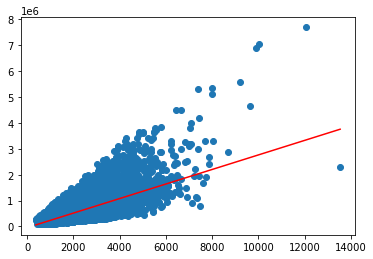

In [10]:
df_sqft_living = pd.DataFrame({'sqft_living': [df['sqft_living'].min(), df['sqft_living'].max()]})
print(df_sqft_living)

predictions = model.predict(df_sqft_living)
print(predictions)

plt.scatter(df['sqft_living'], df['price'])
plt.plot(df_sqft_living, predictions, color='r');

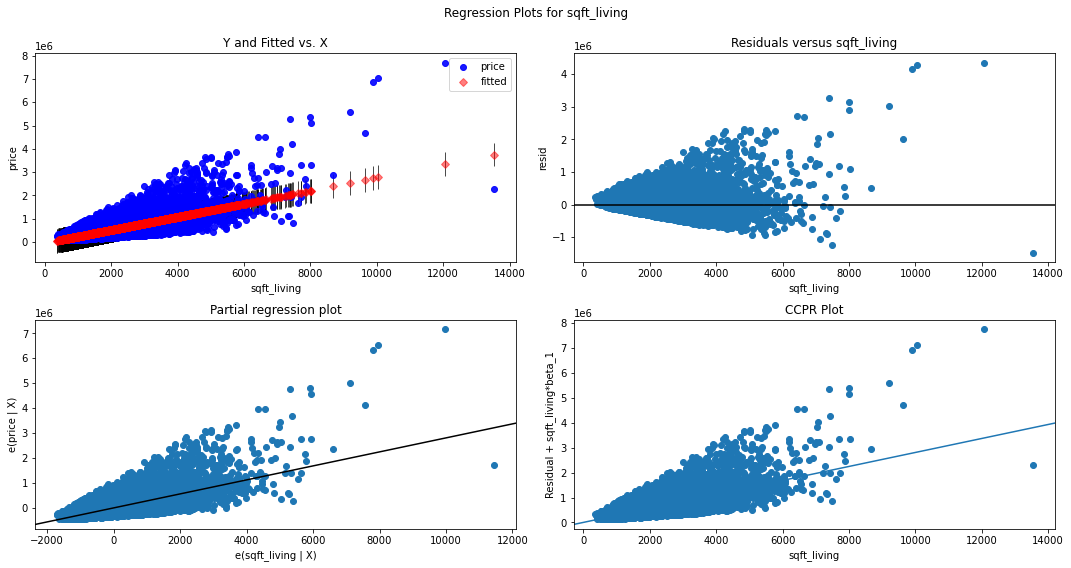

In [11]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig);

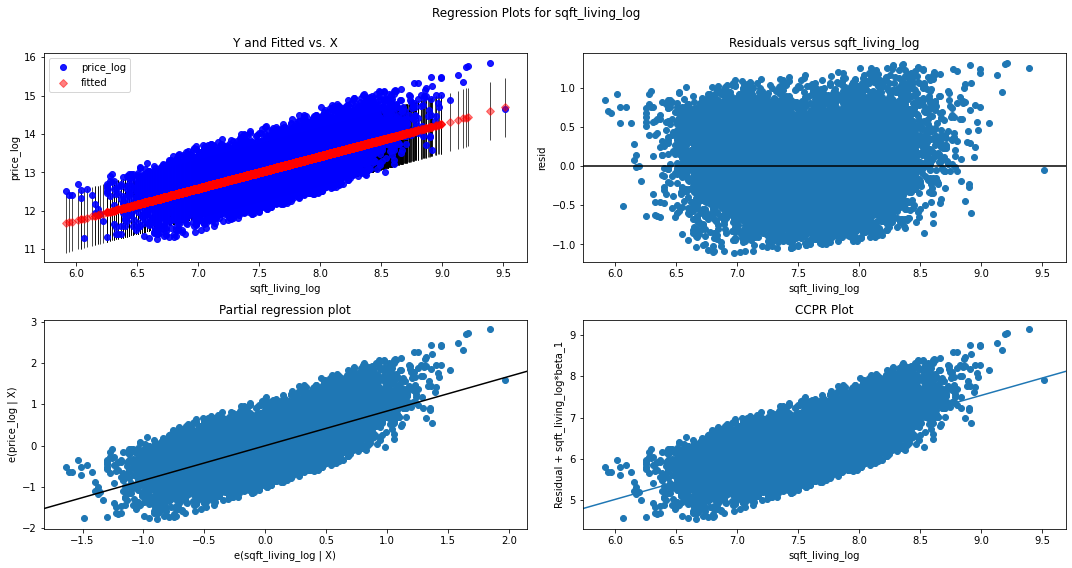

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living_log', fig=fig);

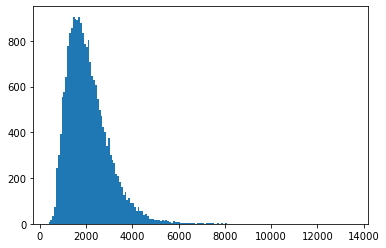

In [12]:
plt.hist(df['sqft_living'], bins='auto');

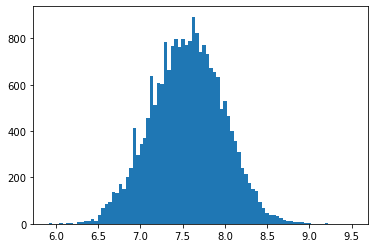

In [13]:
plt.hist(np.log(df['sqft_living']), bins='auto');

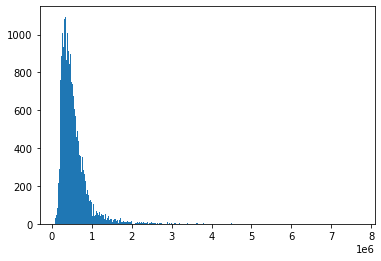

In [14]:
plt.hist((df['price']), bins='auto');

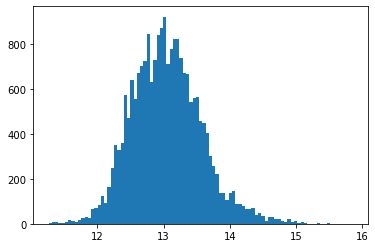

In [15]:
plt.hist(np.log(df['price']), bins='auto');

In [27]:
df['price_log'] = np.log(df['price'])
df['sqft_living_log'] = np.log(df['sqft_living'])

f = 'price_log~sqft_living_log'
model = ols(f, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:29:32   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7234      0.047    142.612      0.000       6.631       6.816
sqft_living_log     0.8376      0.006    134.368      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.096
Skew:                           0.143   Prob(JB):                     1.68e-25
Kurtosis:                       2.787   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predictive Modeling

In [ ]:
relevant_columns = []

In [44]:
X = df[['sqft_living_log']]
y = df[['price_log']]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
from sklearn.dummy import DummyRegressor
baseline = DummyRegressor()
baseline.fit(X_train, y_train)
baseline.score(X_train, y_train)
baseline.score(X_test, y_test)

-0.00034981000904155124

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.45184108615928253

In [48]:
lr.score(X_test, y_test)

0.4652026904015413

## Conclusions